<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


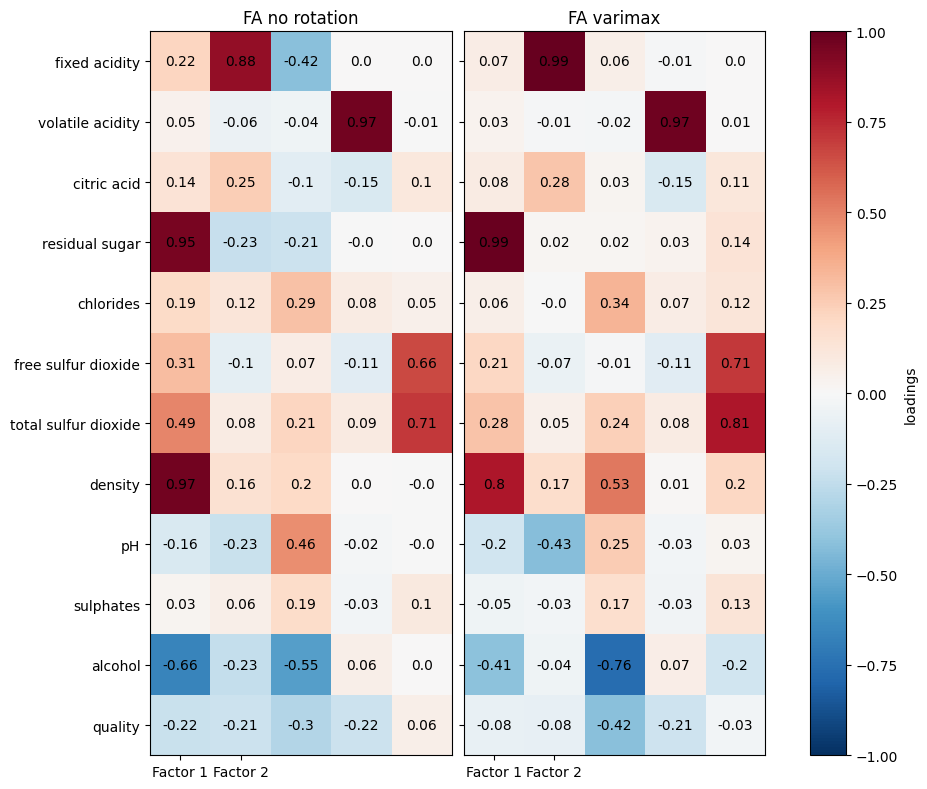

In [99]:
X = StandardScaler().fit_transform(data_white)  # Standardize the data
factors = 5 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(data_white.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(data_white.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

In [68]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer

# Standardize the features before applying Factor Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_white)

# Perform Factor Analysis
transformer = FactorAnalysis(n_components=2)
X_transformed = transformer.fit_transform(X_scaled)

factor_loadings = transformer.components_
# Check the shape of the transformed data
print(X_transformed.shape)
# Access the factor loadings (relationship between original variables and components)

# Convert to a DataFrame for better visualization
loadings_df = pd.DataFrame(factor_loadings, columns=data_white.columns, index=["Factor 1", "Factor 2"])

# Display the factor loadings
loadings_df


(4898, 2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Factor 1,0.264297,0.026490,0.149843,0.839199,0.257480,0.300297,0.533069,0.999710,-0.093733,0.074601,-0.780213,-0.306568
Factor 2,-0.137170,-0.108446,0.051871,0.048277,0.026158,0.940516,0.483417,-0.006376,0.031543,0.041448,-0.016404,0.105960


In [98]:
fa = FactorAnalyzer(n_factors=2, rotation=None)

# Fit the factor analysis model
fa.fit(data_white)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=2, rotation=None, rotation_kwargs={},
            use_smc=True)


# Get factor loadings, eigenvalues, etc.
loadings = fa.loadings_

eigenvalues, _ = fa.get_eigenvalues()

loadings



array([[ 2.52064758e-01, -6.02545958e-01],
       [ 3.17053444e-02, -2.07814761e-04],
       [ 1.85426968e-01, -2.29025520e-01],
       [ 6.84408608e-01,  2.46831433e-02],
       [ 3.08028847e-01, -1.70328961e-02],
       [ 4.16655990e-01,  2.98601018e-01],
       [ 6.40603374e-01,  2.76348445e-01],
       [ 9.76836048e-01,  2.26008923e-03],
       [-1.96871141e-01,  5.59008256e-01],
       [ 4.88235594e-02,  1.58495989e-01],
       [-7.59169179e-01, -1.88112483e-02],
       [-3.29128523e-01,  9.99915940e-02]])

<Axes: >

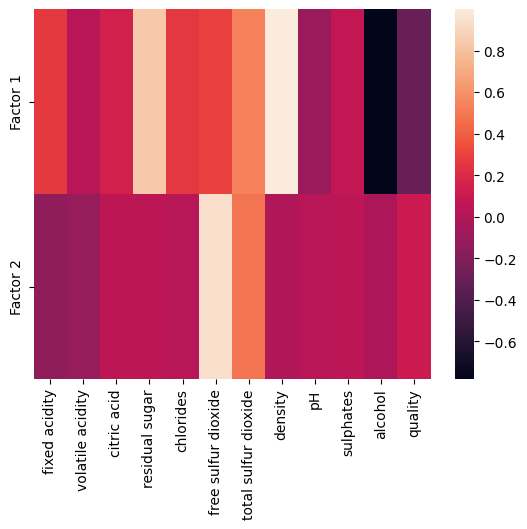

In [50]:
sns.heatmap(loadings_df)


In [47]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
communalities = loadings_df.T.pow(2).sum(axis=1)
print(communalities)

fixed acidity           0.088669
volatile acidity        0.012462
citric acid             0.025144
residual sugar          0.706585
chlorides               0.066980
free sulfur dioxide     0.974749
total sulfur dioxide    0.517855
density                 0.999461
pH                      0.009781
sulphates               0.007283
alcohol                 0.609001
quality                 0.105212
dtype: float64


In [ ]:
fa = FactorAnalysis(n_components = 5, rotation="varimax")
fa.fit(X_scaled)
uniqueness = Series(fa.noise_variance_, index=data_white.columns)
print(uniqueness)

In [ ]:
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(data_white))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

In [ ]:
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_yticks(range(12))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

In [ ]:
pip install factor_analyzer

In [ ]:
fa = FactorAnalysis(n_components = 5, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=data_white.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)